In [1]:
pip install nltk pip install matplotlib  pip install beautifulsoup4  pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [3]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
file='C:\\Users\gaura\OneDrive\Desktop\Sample.txt'


In [5]:
#reading the file
handle = open(file, 'r')
data = handle.read()
print(data)


TXT test file
Purpose: Provide example of this file type
Document file type: TXT
Version: 1.0
Remark:

Example content:
The names "John Doe" for males, "Jane Doe" or "Jane Roe" for females, or "Jonnie Doe" and "Janie Doe" for children, or just "Doe" non-gender-specifically are used as placeholder names for a party whose true identity is unknown or must be withheld in a legal action, case, or discussion. The names are also used to refer to acorpse or hospital patient whose identity is unknown. This practice is widely used in the United States and Canada, but is rarely used in other English-speaking countries including the United Kingdom itself, from where the use of "John Doe" in a legal context originates. The names Joe Bloggs or John Smith are used in the UK instead, as well as in Australia and New Zealand.

John Doe is sometimes used to refer to a typical male in other contexts as well, in a similar manner to John Q. Public, known in Great Britain as Joe Public, John Smith or Joe Blo

In [6]:
# tokenize the data into features (words); display them

features = nltk.word_tokenize( data )
print( features )

['TXT', 'test', 'file', 'Purpose', ':', 'Provide', 'example', 'of', 'this', 'file', 'type', 'Document', 'file', 'type', ':', 'TXT', 'Version', ':', '1.0', 'Remark', ':', 'Example', 'content', ':', 'The', 'names', '``', 'John', 'Doe', "''", 'for', 'males', ',', '``', 'Jane', 'Doe', "''", 'or', '``', 'Jane', 'Roe', "''", 'for', 'females', ',', 'or', '``', 'Jonnie', 'Doe', "''", 'and', '``', 'Janie', 'Doe', "''", 'for', 'children', ',', 'or', 'just', '``', 'Doe', "''", 'non-gender-specifically', 'are', 'used', 'as', 'placeholder', 'names', 'for', 'a', 'party', 'whose', 'true', 'identity', 'is', 'unknown', 'or', 'must', 'be', 'withheld', 'in', 'a', 'legal', 'action', ',', 'case', ',', 'or', 'discussion', '.', 'The', 'names', 'are', 'also', 'used', 'to', 'refer', 'to', 'acorpse', 'or', 'hospital', 'patient', 'whose', 'identity', 'is', 'unknown', '.', 'This', 'practice', 'is', 'widely', 'used', 'in', 'the', 'United', 'States', 'and', 'Canada', ',', 'but', 'is', 'rarely', 'used', 'in', 'other

In [7]:
# normalize the features to lower case and exclude punctuation
features = [ feature for feature in features if feature.isalpha() ]
features = [ feature.lower() for feature in features ]
print( features )

['txt', 'test', 'file', 'purpose', 'provide', 'example', 'of', 'this', 'file', 'type', 'document', 'file', 'type', 'txt', 'version', 'remark', 'example', 'content', 'the', 'names', 'john', 'doe', 'for', 'males', 'jane', 'doe', 'or', 'jane', 'roe', 'for', 'females', 'or', 'jonnie', 'doe', 'and', 'janie', 'doe', 'for', 'children', 'or', 'just', 'doe', 'are', 'used', 'as', 'placeholder', 'names', 'for', 'a', 'party', 'whose', 'true', 'identity', 'is', 'unknown', 'or', 'must', 'be', 'withheld', 'in', 'a', 'legal', 'action', 'case', 'or', 'discussion', 'the', 'names', 'are', 'also', 'used', 'to', 'refer', 'to', 'acorpse', 'or', 'hospital', 'patient', 'whose', 'identity', 'is', 'unknown', 'this', 'practice', 'is', 'widely', 'used', 'in', 'the', 'united', 'states', 'and', 'canada', 'but', 'is', 'rarely', 'used', 'in', 'other', 'countries', 'including', 'the', 'united', 'kingdom', 'itself', 'from', 'where', 'the', 'use', 'of', 'john', 'doe', 'in', 'a', 'legal', 'context', 'originates', 'the', 

In [8]:
# create a list of (English) stopwords, and then remove them from the features
from nltk.corpus import stopwords
stopwords = stopwords.words( 'english' )
features  = [ feature for feature in features if feature not in stopwords ]

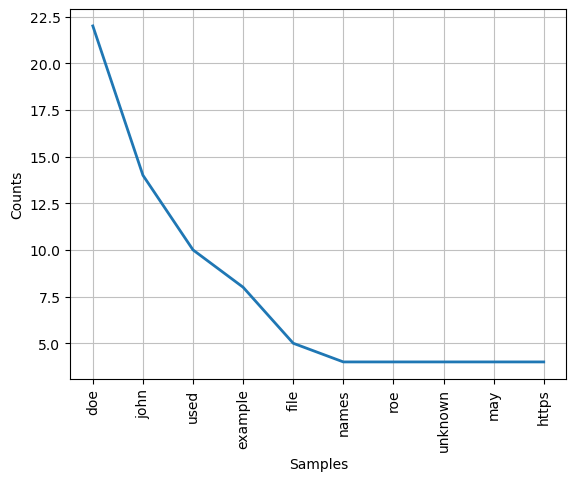

In [9]:
# count & tabulate the features, and then plot the results -- season to taste
frequencies = nltk.FreqDist( features )
plot = frequencies.plot( 10 )


In [10]:
# create a list of unique words (hapaxes); display them
hapaxes = frequencies.hapaxes()
print( hapaxes )

['test', 'purpose', 'document', 'version', 'remark', 'males', 'females', 'jonnie', 'janie', 'children', 'placeholder', 'party', 'true', 'must', 'withheld', 'discussion', 'acorpse', 'hospital', 'patient', 'practice', 'widely', 'states', 'canada', 'countries', 'including', 'kingdom', 'context', 'originates', 'uk', 'instead', 'australia', 'new', 'zealand', 'sometimes', 'typical', 'male', 'contexts', 'similar', 'manner', 'q', 'known', 'great', 'britain', 'first', 'listed', 'often', 'along', 'address', 'information', 'fill', 'frequently', 'popular', 'culture', 'frank', 'capra', 'film', 'meet', 'television', 'series', 'similarly', 'child', 'notorious', 'kansas', 'city', 'missouri', 'victim', 'precious', 'unidentified', 'female', 'victims', 'cali', 'princess', 'additional', 'persons', 'called', 'james', 'judy', 'however', 'avoid', 'possible', 'confusion', 'two', 'specific', 'surnames', 'simultaneously', 'several', 'referenced', 'simply', 'operation', 'delego', 'numbered', 'variants', 'poe', '

In [11]:
# count & tabulate ngrams from the features -- season to taste; display some
ngrams      = nltk.ngrams( features, 2 )
frequencies = nltk.FreqDist( ngrams )
frequencies.most_common( 10 )

[(('john', 'doe'), 10),
 (('identity', 'unknown'), 3),
 (('provide', 'example'), 2),
 (('file', 'type'), 2),
 (('example', 'content'), 2),
 (('doe', 'jane'), 2),
 (('jane', 'roe'), 2),
 (('also', 'used'), 2),
 (('used', 'refer'), 2),
 (('whose', 'identity'), 2)]

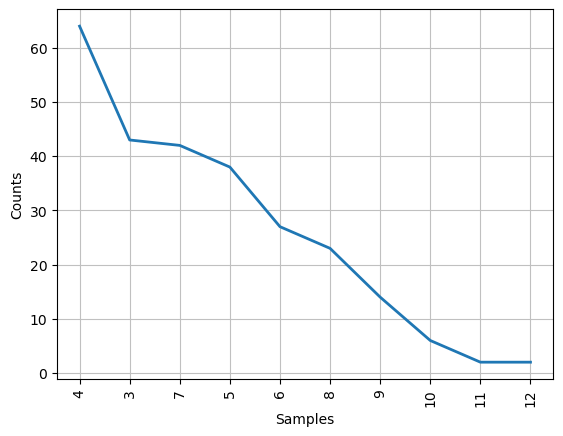

In [22]:
# create a list each token's length, and plot the result; How many "long" words are there?
lengths = [ len( feature ) for feature in features ]
plot    = nltk.FreqDist( lengths ).plot( 10 )

In [23]:
# initialize a stemmer, stem the features, count & tabulate, and output
from nltk.stem import PorterStemmer
stemmer     = PorterStemmer()
stems       = [ stemmer.stem( feature ) for feature in features ]
frequencies = nltk.FreqDist( stems )
frequencies.most_common( 10 )

[('doe', 22),
 ('john', 14),
 ('use', 12),
 ('exampl', 8),
 ('name', 7),
 ('file', 6),
 ('roe', 4),
 ('unknown', 4),
 ('case', 4),
 ('refer', 4)]

In [30]:
# re-create the features and create a NLTK Text object, so other cool things can be done
features = nltk.word_tokenize( data )
text     = nltk.Text( features )

In [37]:
# count & tabulate, again; list a given word -- season to taste
frequencies = nltk.FreqDist( text )
print( frequencies[ 'use' ] )

2


In [38]:
# do keyword-in-context searching against the text (concordancing)
print( text.concordance( 'book' ) )

no matches
None


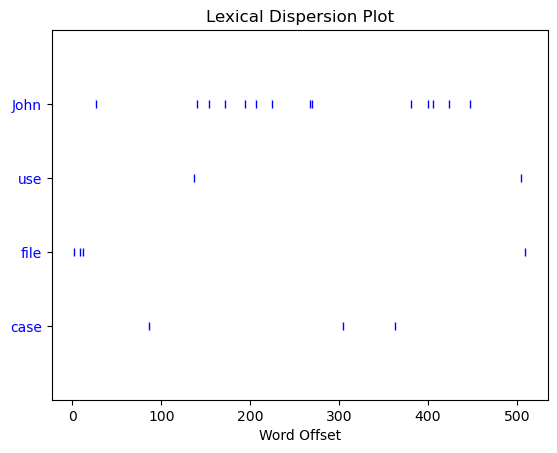

In [39]:
# create a dispersion plot of given words
plot = text.dispersion_plot( [ 'John', 'use', 'file', 'case' ] )

In [40]:
# output the "most significant" bigrams, considering surrounding words (size of window) -- season to taste
text.collocations( num=20, window_size=4 )

John Doe; whose identity; identity unknown; Example content; anonymous
parties; Joe Bloggs; file type; Jane Roe; whose unknown; rarely used;
used refer; John Smith; also used; Doe Roe; Joe John; Doe Doe
